In [4]:
# example of loading a pix2pix model and using it for one-off image translation
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import expand_dims
from matplotlib import pyplot
import cv2

import tensorflow as tf

In [5]:

# load an image
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels



# load model
#model = load_model('results/GeneratorModel84.h5')
model = tf.keras.models.load_model('results/GeneratorModel84.h5')

ValueError: Unknown layer: Functional

In [ ]:
# load source image
src_image = load_image('sketch_test.png')
print('Loaded', src_image.shape)

blur = cv2.GaussianBlur(src_image[0],(15,15),0)
print(blur.shape)
blur = expand_dims(blur, axis=0)
# generate image from source
gen_image = model.predict(blur)

# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image

pyplot.imshow(gen_image[0])

pyplot.axis('off')
pyplot.show()

In [ ]:
blur = cv2.blur(gen_image[0],(5,5))
pyplot.imshow(blur)
pyplot.axis('off')
pyplot.show()

In [33]:
cv2.imwrite('sketch_test2.png', gen_image[0] * 255)

True

In [9]:
model2 = load_model('results_erosion/pix2pix_g_model_000075.h5')



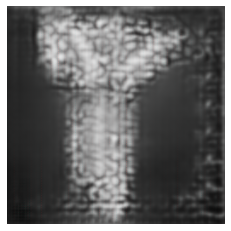

In [10]:
src_image = load_image('sketch_test2.png')
gen_image = model2.predict(src_image)

# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image

pyplot.imshow(gen_image[0])

pyplot.axis('off')
pyplot.show()




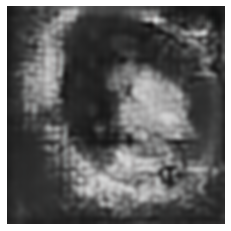

True

In [50]:
blur = cv2.blur(gen_image[0],(5,5))
pyplot.imshow(blur)

pyplot.axis('off')
pyplot.show()

cv2.imwrite('sketch_test3.png', blur * 255)